In [1]:
import pandas as pd

In [55]:
results_dir = '/Users/kaitlynwang/DataDecide/results/results 3/processed_data/'

df = pd.read_csv(f'{results_dir}results_ladder_5xC_seeds_cleaned_correct_params_pre_extra_real.csv')


In [4]:
df.head()

,model,group,task,step,seed,chinchilla,tokens,compute,metrics
0,150M,DCLM-baseline,arc_challenge,0,14,5xC,0,0.000000e+00,"{'predicted_index_raw': 1.2005119453924915, 'p..."
1,150M,DCLM-baseline,arc_challenge,0,15,5xC,0,0.000000e+00,"{'predicted_index_raw': 1.1757679180887373, 'p..."
2,150M,DCLM-baseline,arc_challenge,0,6198,5xC,0,0.000000e+00,"{'predicted_index_raw': 1.1552901023890785, 'p..."
3,150M,DCLM-baseline,arc_challenge,1250,14,5xC,491520000,4.479680e+17,"{'predicted_index_raw': 1.1595563139931742, 'p..."
4,150M,DCLM-baseline,arc_challenge,1250,15,5xC,491520000,4.479680e+17,"{'predicted_index_raw': 1.1945392491467577, 'p..."


In [ ]:
set(df['group'])


{'arc_challenge',
 'arc_easy',
 'boolq',
 'csqa',
 'hellaswag',
 'mmlu_abstract_algebra',
 'mmlu_anatomy',
 'mmlu_astronomy',
 'mmlu_business_ethics',
 'mmlu_clinical_knowledge',
 'mmlu_college_biology',
 'mmlu_college_chemistry',
 'mmlu_college_computer_science',
 'mmlu_college_mathematics',
 'mmlu_college_medicine',
 'mmlu_college_physics',
 'mmlu_computer_security',
 'mmlu_conceptual_physics',
 'mmlu_econometrics',
 'mmlu_electrical_engineering',
 'mmlu_elementary_mathematics',
 'mmlu_formal_logic',
 'mmlu_global_facts',
 'mmlu_high_school_biology',
 'mmlu_high_school_chemistry',
 'mmlu_high_school_computer_science',
 'mmlu_high_school_european_history',
 'mmlu_high_school_geography',
 'mmlu_high_school_government_and_politics',
 'mmlu_high_school_macroeconomics',
 'mmlu_high_school_mathematics',
 'mmlu_high_school_microeconomics',
 'mmlu_high_school_physics',
 'mmlu_high_school_psychology',
 'mmlu_high_school_statistics',
 'mmlu_high_school_us_history',
 'mmlu_high_school_world_his

In [14]:
set(df['task'])

{'arc_challenge',
 'arc_easy',
 'boolq',
 'csqa',
 'hellaswag',
 'mmlu_abstract_algebra',
 'mmlu_anatomy',
 'mmlu_astronomy',
 'mmlu_business_ethics',
 'mmlu_clinical_knowledge',
 'mmlu_college_biology',
 'mmlu_college_chemistry',
 'mmlu_college_computer_science',
 'mmlu_college_mathematics',
 'mmlu_college_medicine',
 'mmlu_college_physics',
 'mmlu_computer_security',
 'mmlu_conceptual_physics',
 'mmlu_econometrics',
 'mmlu_electrical_engineering',
 'mmlu_elementary_mathematics',
 'mmlu_formal_logic',
 'mmlu_global_facts',
 'mmlu_high_school_biology',
 'mmlu_high_school_chemistry',
 'mmlu_high_school_computer_science',
 'mmlu_high_school_european_history',
 'mmlu_high_school_geography',
 'mmlu_high_school_government_and_politics',
 'mmlu_high_school_macroeconomics',
 'mmlu_high_school_mathematics',
 'mmlu_high_school_microeconomics',
 'mmlu_high_school_physics',
 'mmlu_high_school_psychology',
 'mmlu_high_school_statistics',
 'mmlu_high_school_us_history',
 'mmlu_high_school_world_his

In [ ]:
from collections import defaultdict
datamix_perf_on_task = defaultdict(lambda: defaultdict(float))

tasks = list(set(df['task'][df['task'].str.contains("mathematics|computer_science|formal_logic", case=False, na=False)]))
tasks += ["hellaswag", "piqa"]
for datamix in set(df['group']):
    for task in tasks:
        datamix_results = df[(df['group'] == datamix) & (df['task'] == task)]
        if not datamix_results.empty:
            accuracy = datamix_results['metrics'].apply(lambda x: eval(x).get("primary_metric"))
            mean_accuracy = accuracy.mean()
            datamix_perf_on_task[datamix][task] = mean_accuracy
            print(f'{datamix} on {task}: {mean_accuracy}')

dclm_ft7percentile_fw3 on mmlu_college_computer_science: 0.2853662182361734
dclm_ft7percentile_fw3 on mmlu_high_school_computer_science: 0.25322869955156957
dclm_ft7percentile_fw3 on mmlu_formal_logic: 0.2821909032671364
dclm_ft7percentile_fw3 on mmlu_high_school_mathematics: 0.16492830648286555
dclm_ft7percentile_fw3 on mmlu_college_mathematics: 0.17210762331838564
dclm_ft7percentile_fw3 on mmlu_elementary_mathematics: 0.2609319761786129
dclm_ft7percentile_fw3 on hellaswag: 0.36514903474167837
dclm_ft7percentile_fw3 on piqa: 0.6242959218361415
no_math_no_code on mmlu_college_computer_science: 0.2852316890881913
no_math_no_code on mmlu_high_school_computer_science: 0.22774289985052315
no_math_no_code on mmlu_formal_logic: 0.2781455382352243
no_math_no_code on mmlu_high_school_mathematics: 0.16772961302109285
no_math_no_code on mmlu_college_mathematics: 0.16394618834080715
no_math_no_code on mmlu_elementary_mathematics: 0.23556836785536334
no_math_no_code on hellaswag: 0.380115473159218

In [ ]:
print(df['metrics'][0])

{'predicted_index_raw': 1.2005119453924915, 'predicted_index_per_token': 1.5324232081911262, 'predicted_index_per_char': 1.6561433447098977, 'predicted_index_uncond': 1.5170648464163823, 'correct_choice': 1.523890784982935, 'acc_raw': 0.21160409556313994, 'acc_per_token': 0.22525597269624573, 'acc_per_char': 0.25853242320819114, 'acc_uncond': 0.2295221843003413, 'correct_prob': 1.981389824623675e-06, 'correct_prob_per_token': 1.8021035398097294e-05, 'correct_prob_per_char': 0.13151733459053216, 'margin': -1.7022271552744875e-06, 'margin_per_token': -3.933208313063564e-06, 'margin_per_char': -0.03135011272985789, 'total_prob': 8.069648914779951e-06, 'total_prob_per_token': 7.245466945015402e-05, 'total_prob_per_char': 0.5174438042306126, 'uncond_correct_prob': 2.00887186648538e-06, 'uncond_correct_prob_per_token': 1.860035447645873e-05, 'uncond_correct_prob_per_char': 0.13222722364685094, 'uncond_total_prob': 8.33494123326741e-06, 'norm_correct_prob': 0.2205431068086273, 'norm_correct_p

In [57]:
df = pd.DataFrame(datamix_perf_on_task)
df = df.T
df = df.loc[df.mean(axis=1).sort_values(ascending=False).index]

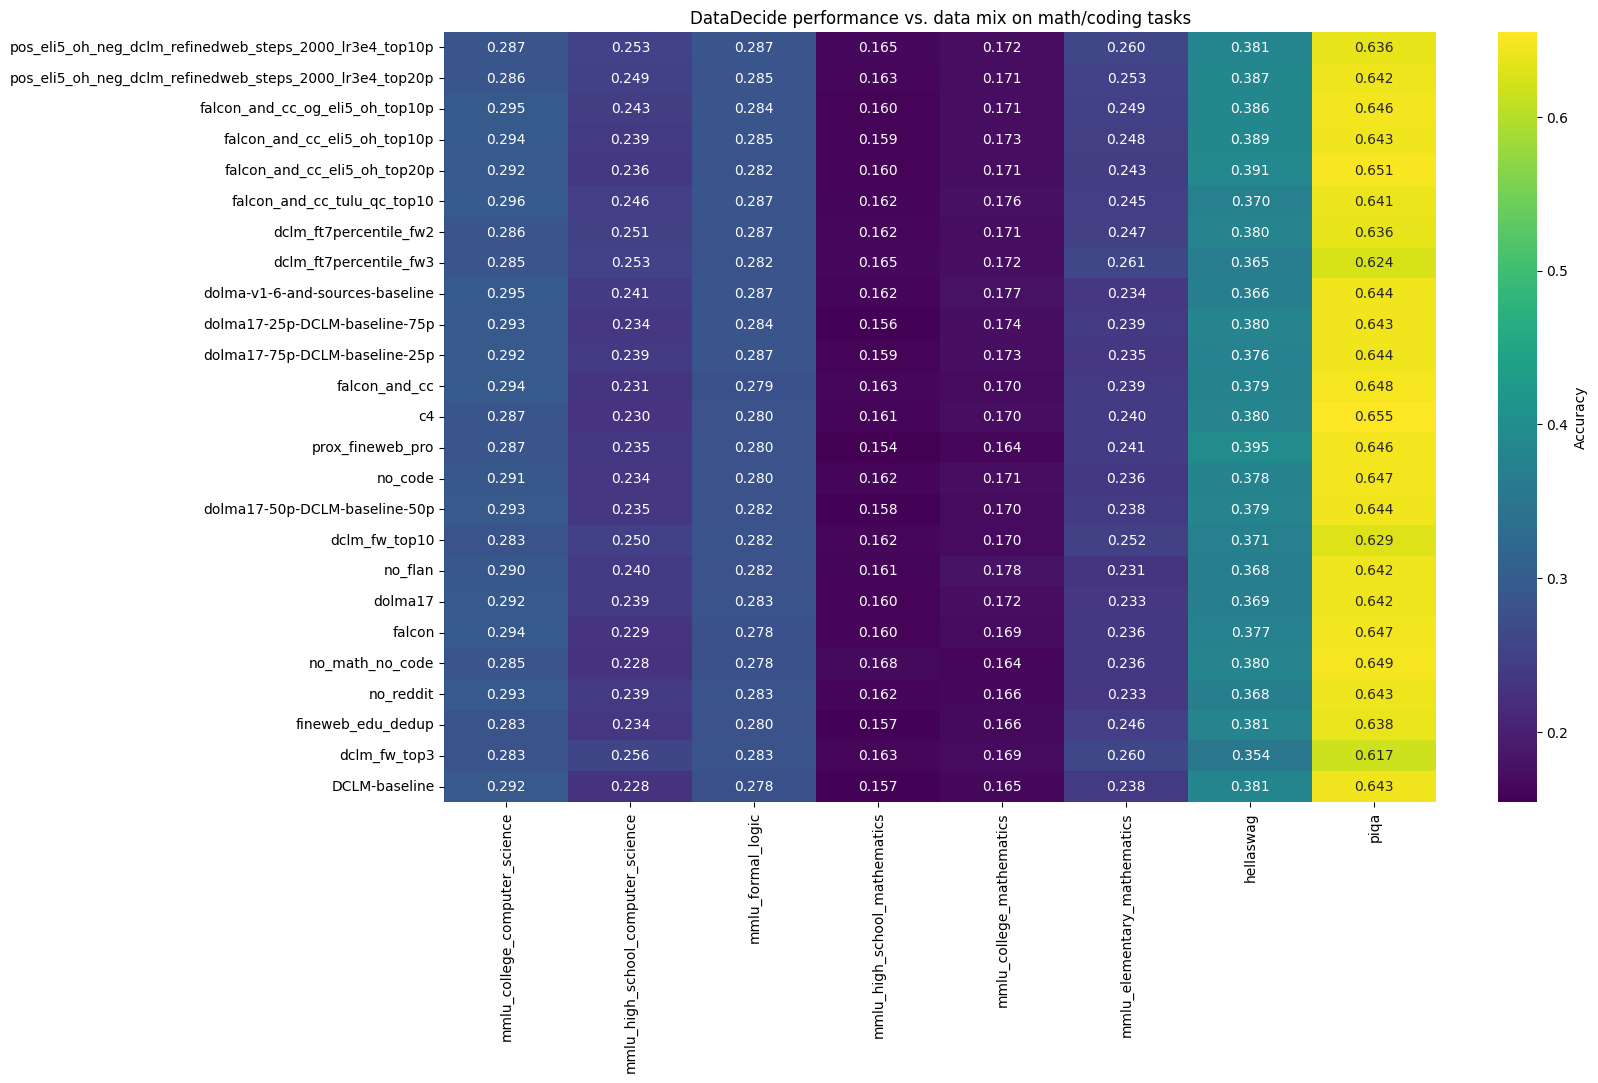

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(df, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
plt.title("DataDecide performance vs. data mix on math/coding tasks")
#plt.tight_layout()
plt.show()

In [43]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


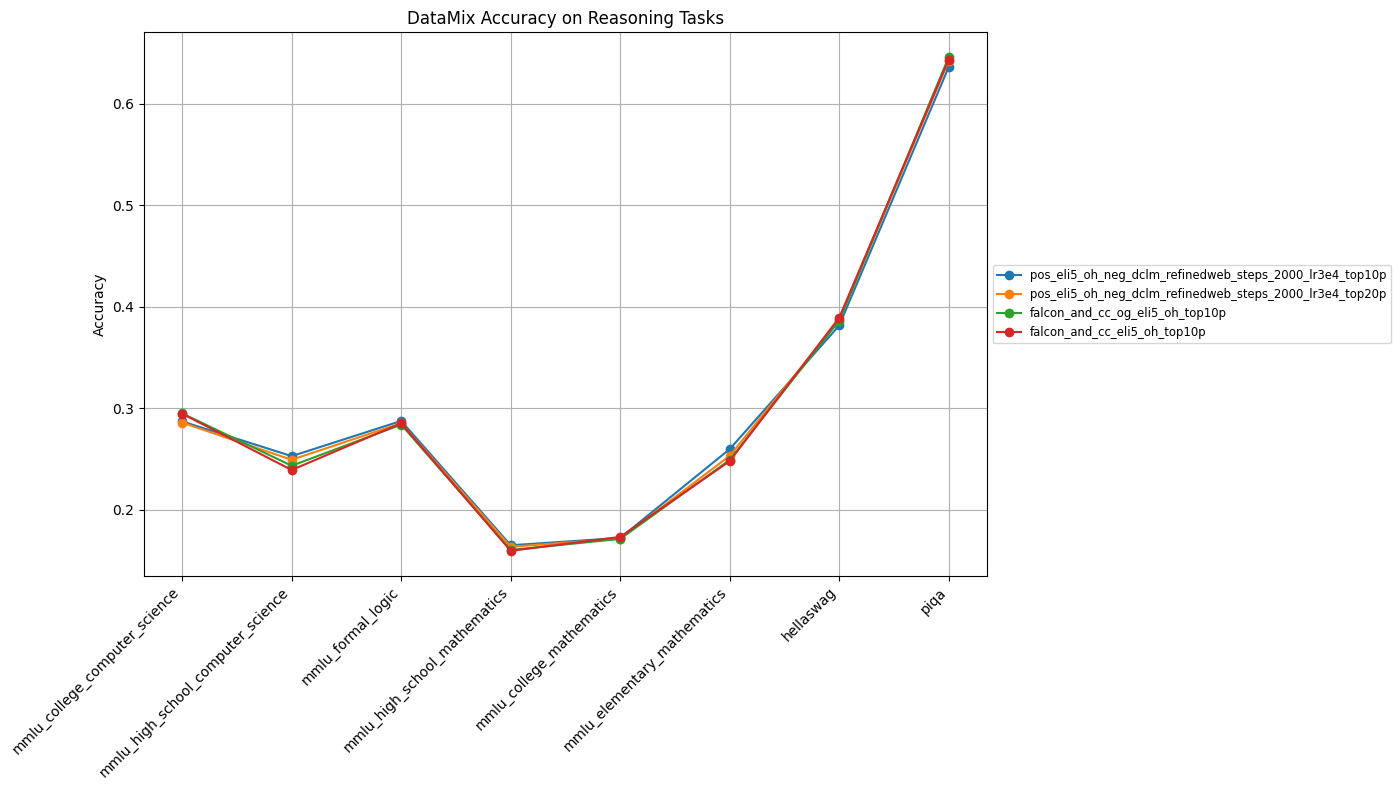

In [65]:
top_mixes = df.mean(axis=1).sort_values(ascending=False).head(4).index
df_subset = df.loc[top_mixes]

plt.figure(figsize=(14, 8))
for datamix in df_subset.index:
    plt.plot(df_subset.columns, df_subset.loc[datamix], marker='o', label=datamix)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("DataMix Accuracy on Reasoning Tasks")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.tight_layout()
plt.grid(True)
plt.show()

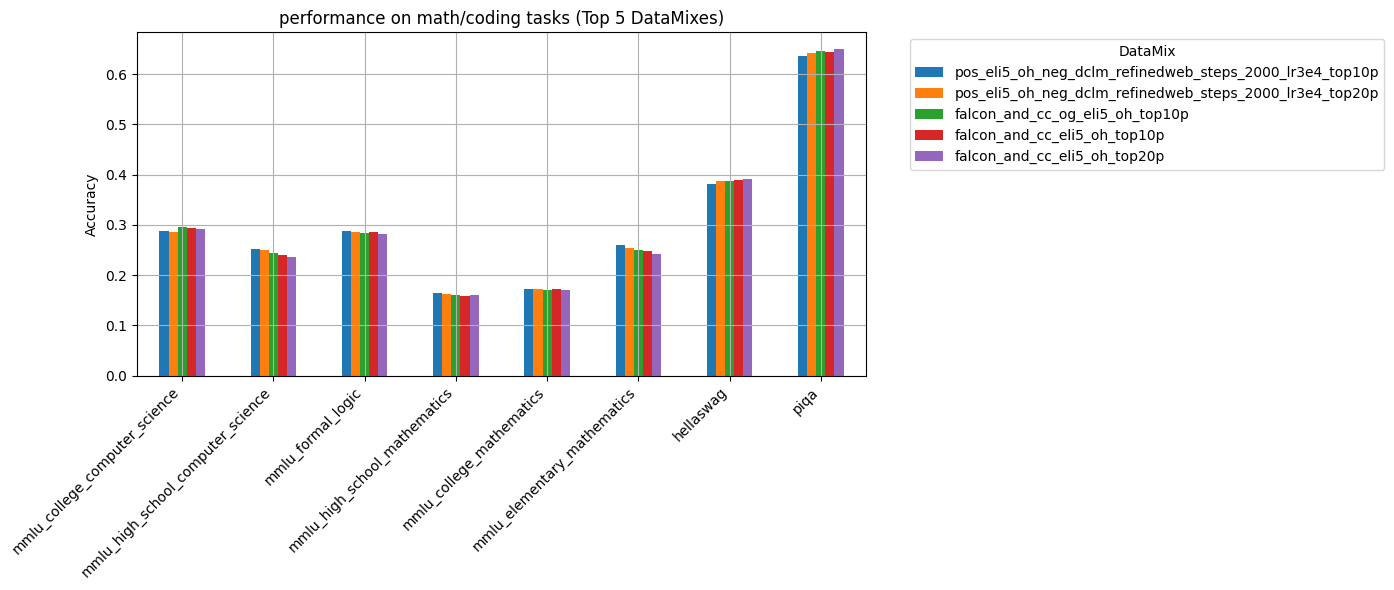

In [66]:
top_mixes = df.mean(axis=1).sort_values(ascending=False).head(5).index
df_subset = df.loc[top_mixes]

df_subset.T.plot(kind='bar', figsize=(14, 6))
plt.title("performance on math/coding tasks (Top 5 DataMixes)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.legend(title="DataMix", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [67]:
df = pd.read_csv(f'{results_dir}results_ladder_5xC_seeds_cleaned_correct_params_pre_extra_real.csv')

from collections import defaultdict
datamix_1B_perf_on_task = defaultdict(lambda: defaultdict(float))

tasks = list(set(df['task'][df['task'].str.contains("mathematics|computer_science|formal_logic", case=False, na=False)]))
tasks += ["hellaswag", "piqa"]
for datamix in set(df['group']):
    for task in tasks:
        datamix_results = df[(df['group'] == datamix) & (df['task'] == task) & (df['model'] == '1B')]
        if not datamix_results.empty:
            accuracy = datamix_results['metrics'].apply(lambda x: eval(x).get("primary_metric"))
            mean_accuracy = accuracy.mean()
            datamix_1B_perf_on_task[datamix][task] = mean_accuracy
            print(f'{datamix} on {task}: {mean_accuracy}')

dclm_ft7percentile_fw3 on mmlu_college_computer_science: 0.2793827160493827
dclm_ft7percentile_fw3 on mmlu_high_school_computer_science: 0.29246913580246914
dclm_ft7percentile_fw3 on mmlu_formal_logic: 0.29629629629629634
dclm_ft7percentile_fw3 on mmlu_high_school_mathematics: 0.18033836305441245
dclm_ft7percentile_fw3 on mmlu_college_mathematics: 0.16592592592592592
dclm_ft7percentile_fw3 on mmlu_elementary_mathematics: 0.3165131621921745
dclm_ft7percentile_fw3 on hellaswag: 0.48507380114629667
dclm_ft7percentile_fw3 on piqa: 0.6857023871895108
no_math_no_code on mmlu_college_computer_science: 0.30123456790123454
no_math_no_code on mmlu_high_school_computer_science: 0.2623456790123456
no_math_no_code on mmlu_formal_logic: 0.2807172251616696
no_math_no_code on mmlu_high_school_mathematics: 0.161225422953818
no_math_no_code on mmlu_college_mathematics: 0.16987654320987652
no_math_no_code on mmlu_elementary_mathematics: 0.2546541250244954
no_math_no_code on hellaswag: 0.5340545019559824


In [70]:

df1b = pd.DataFrame(datamix_1B_perf_on_task)
df1b = df1b.T
df1b = df1b.loc[df1b.mean(axis=1).sort_values(ascending=False).index]

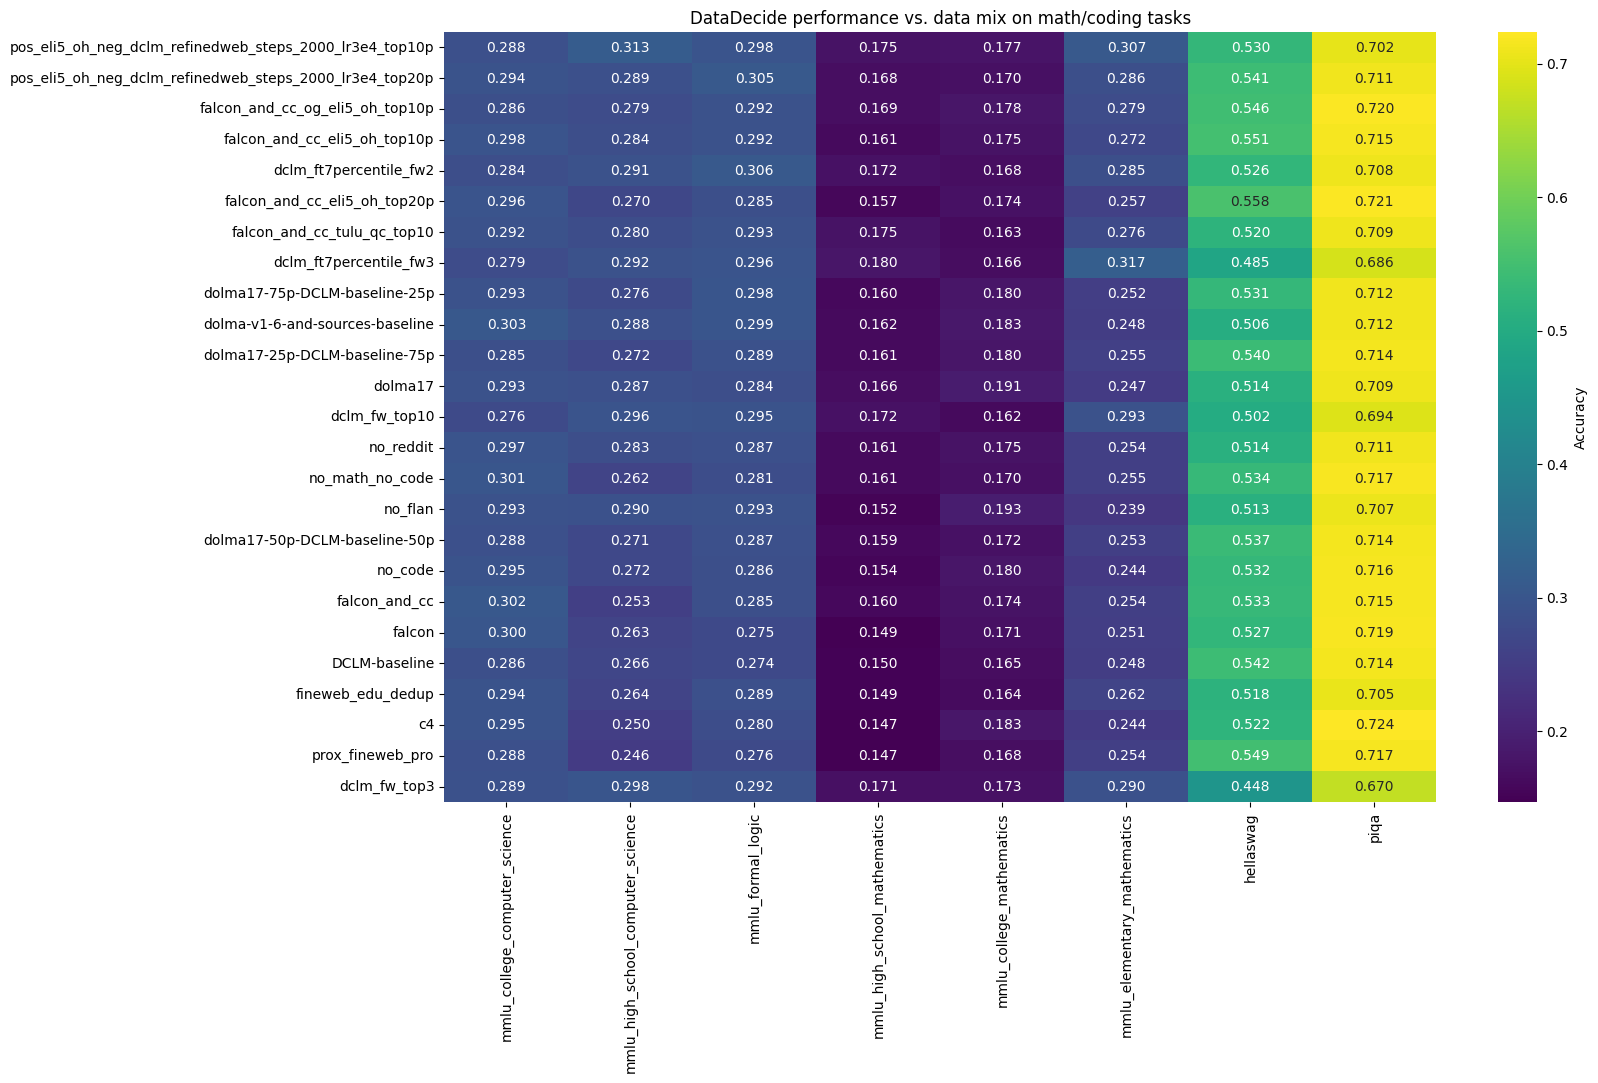

In [71]:
plt.figure(figsize=(16,10))
sns.heatmap(df1b, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
plt.title("DataDecide performance vs. data mix on math/coding tasks")
#plt.tight_layout()
plt.show()

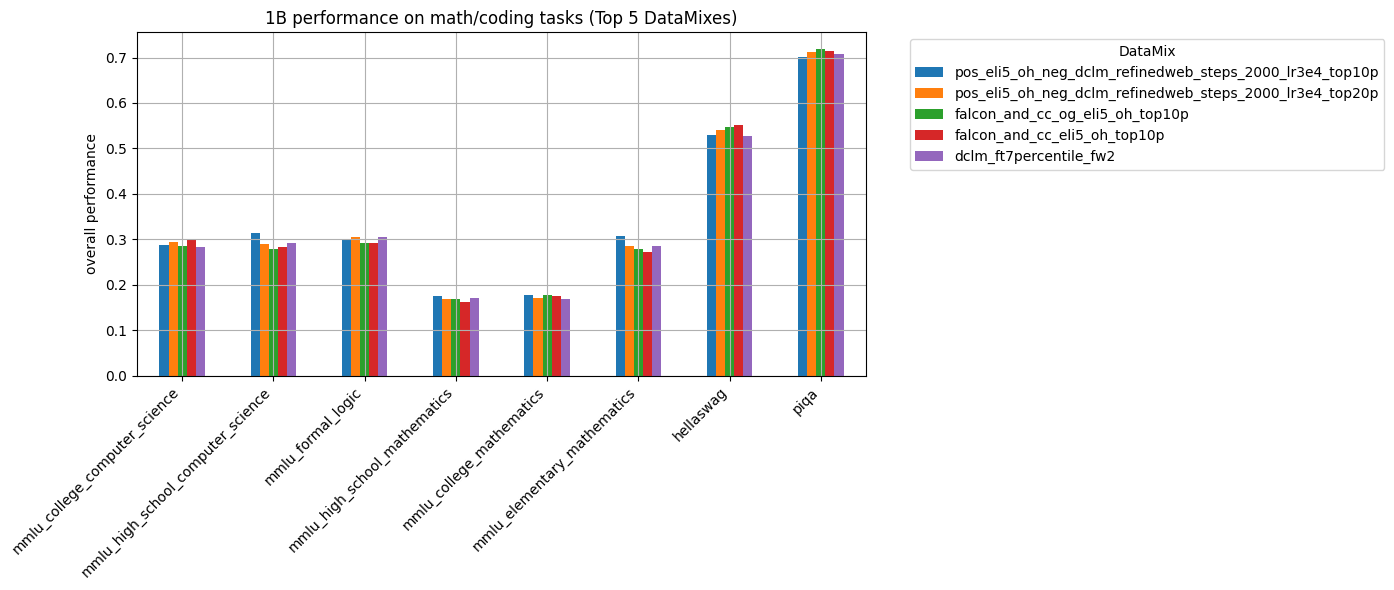

In [73]:
top_mixes = df1b.mean(axis=1).sort_values(ascending=False).head(5).index
df_subset = df1b.loc[top_mixes]

df_subset.T.plot(kind='bar', figsize=(14, 6))
plt.title("1B performance on math/coding tasks (Top 5 DataMixes)")
plt.ylabel("overall performance")
plt.xticks(rotation=45, ha='right')
plt.legend(title="DataMix", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()